In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.decomposition import PCA


In [3]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
X = df.drop(columns='target')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

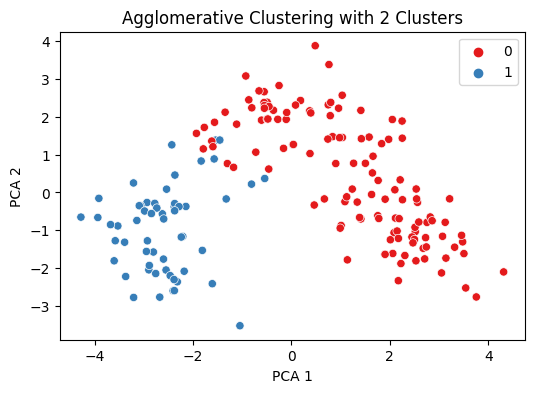

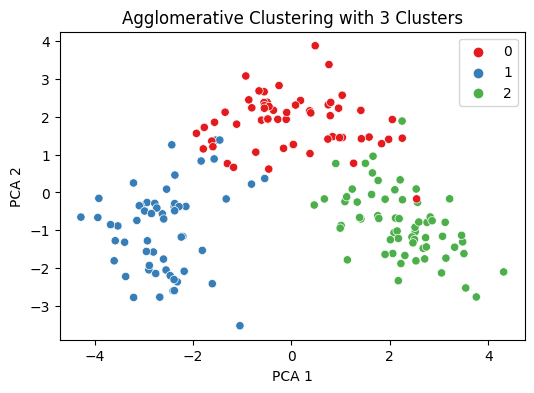

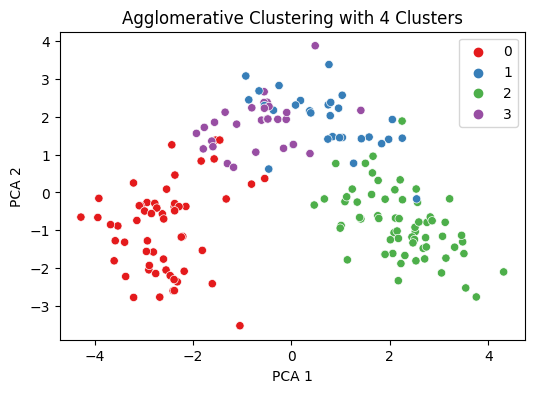

In [8]:
for n_clusters in [2, 3, 4]:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_scaled)

    # Plotting 2 principal components for visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="Set1")
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

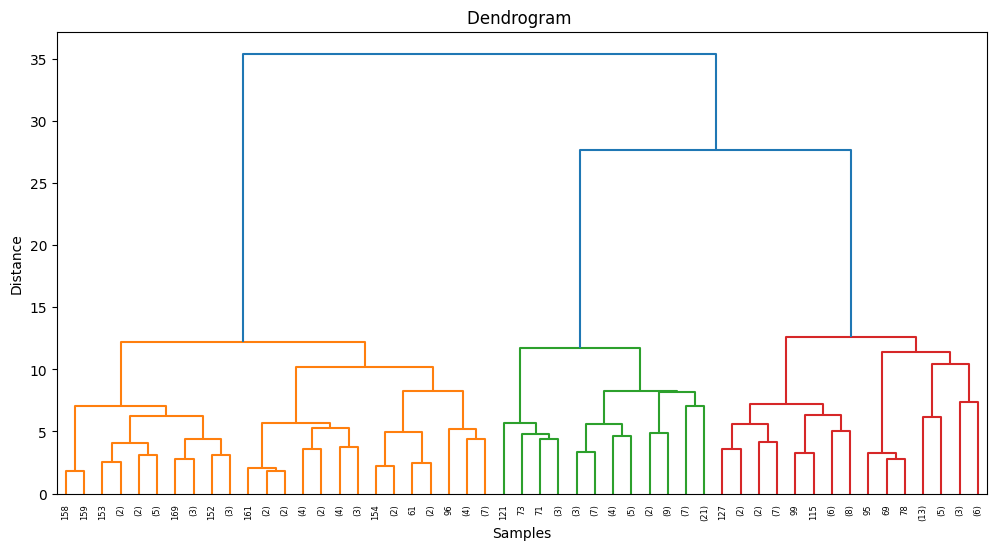

In [9]:
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)  # You can change p for more/less detail
plt.title('Dendrogram ')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## DBSCAN

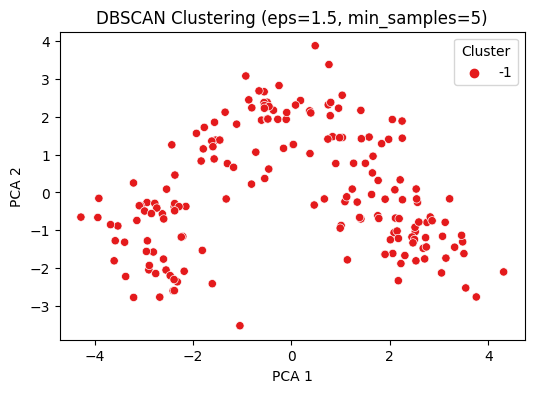

In [10]:
# DBSCAN with a sample parameter set
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize Clusters
plt.figure(figsize=(6, 4))
unique_labels = np.unique(dbscan_labels)
palette = sns.color_palette('Set1', len(unique_labels))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette=palette)
plt.title(f'DBSCAN Clustering (eps=1.5, min_samples=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [11]:
sets = [(0.5, 5), (1.0, 5), (1.5, 5), (2.0, 3)]


DBSCAN (eps=0.5, min_samples=5)
Estimated clusters: 0
Noise points: 178
Silhouette Score: Not applicable (only 1 cluster)
Homogeneity Score: 0.000
Completeness Score: 1.000


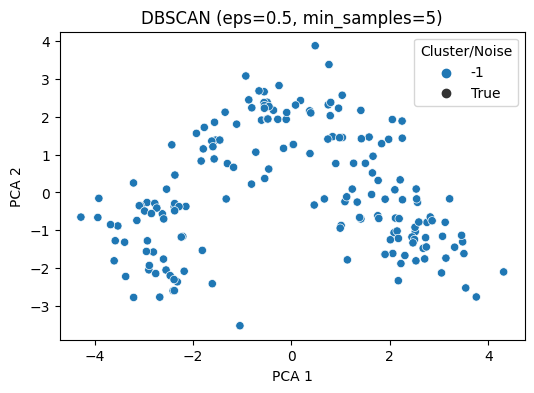


DBSCAN (eps=1.0, min_samples=5)
Estimated clusters: 0
Noise points: 178
Silhouette Score: Not applicable (only 1 cluster)
Homogeneity Score: 0.000
Completeness Score: 1.000


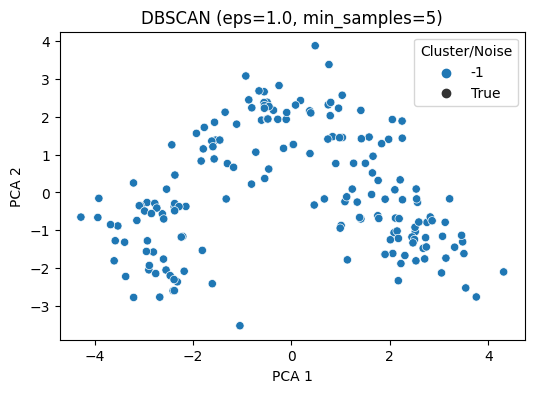


DBSCAN (eps=1.5, min_samples=5)
Estimated clusters: 0
Noise points: 178
Silhouette Score: Not applicable (only 1 cluster)
Homogeneity Score: 0.000
Completeness Score: 1.000


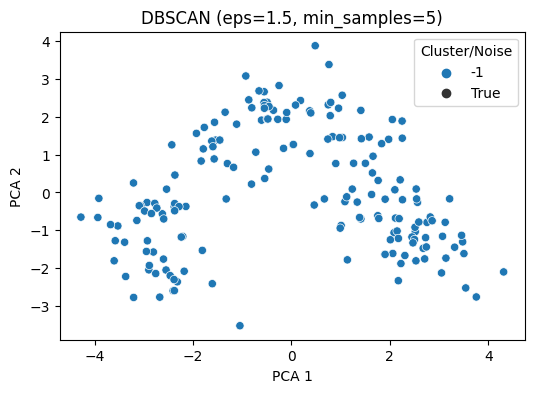


DBSCAN (eps=2.0, min_samples=3)
Estimated clusters: 5
Noise points: 64
Silhouette Score: 0.031
Homogeneity Score: 0.442
Completeness Score: 0.372


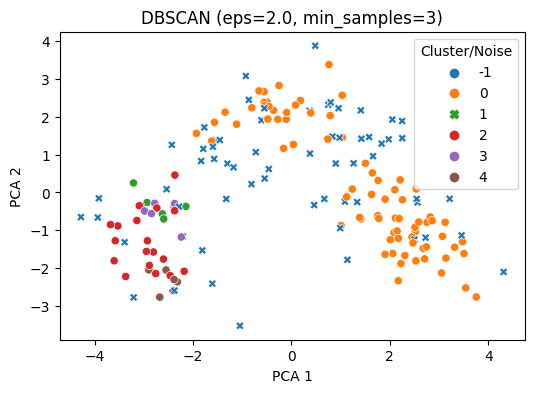

In [12]:
for eps, min_samples in sets:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"\nDBSCAN (eps={eps}, min_samples={min_samples})")
    print(f"Estimated clusters: {n_clusters}")
    print(f"Noise points: {n_noise}")
    
    if n_clusters > 1:
        sil_score = silhouette_score(X_scaled, labels)
        print(f"Silhouette Score: {sil_score:.3f}")
    else:
        print("Silhouette Score: Not applicable (only 1 cluster)")
    
    print(f"Homogeneity Score: {homogeneity_score(df['target'], labels):.3f}")
    print(f"Completeness Score: {completeness_score(df['target'], labels):.3f}")

    # Plot
    pca_data = PCA(n_components=2).fit_transform(X_scaled)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='tab10', style=(labels == -1))
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster/Noise')
    plt.show()